In [3]:
import glob
import numpy as np
import os
import pickle
from utils import create_folders
from utils import split_stack
from create_movies import apply_create_movie
from create_movies import rgba_to_rgb
from matplotlib import pyplot as plt
from skimage import io
import pandas as pd

# Create color movies based on a variable
Create movies where the nucleus of each cell is colored based on the value of a variable. The variable is determined by the frame and particle id. The color is given by a colormap.

Start by defining the project path, all necessary folders are the created automatically. If you ran the pipeline first, everything should be already set up - just use the same `project_path`. 

In [4]:
###### CHANGE THIS #####
project_path = "/home/lhinder/myscratch/agn/" #Absolute path where this project is stored. End path with "/".
########################

folders = ["stacks_raw","stacks_labeled","table_tracked","movies","tmp"]
create_folders(project_path,folders) #Create new folders if they don't already exist

tmp_path = project_path+"tmp/" #where temporary files are stored
tiff_path = project_path + "stacks_labeled/"
tiff_file_paths = (glob.glob(tiff_path + "*.tif*"))
tiff_file_paths.sort()
tiff_file_names = [os.path.basename(name) for name in tiff_file_paths]
print("Found {nb_files} tiff file(s): {names}".format(nb_files=len(tiff_file_names),names = tiff_file_names))

Directory /home/lhinder/myscratch/agn/stacks_raw already exists
Directory /home/lhinder/myscratch/agn/stacks_labeled already exists
Directory /home/lhinder/myscratch/agn/table_tracked already exists
Directory /home/lhinder/myscratch/agn/movies already exists
Directory /home/lhinder/myscratch/agn/tmp already exists


## Define parameters for coloring
A custom cmap is created, so colorings are comparable across frames/FOVs/experiments. The variable which the image is colored by is `variable_name`. 

#### RGB vs. RGBA

The output is an `RGBA` image, where the background is transparent. As some applications (e.g. `imagej`) can't natively handle transparency, there is an option `convert_to_rgb`. It will replace all transparent background pixels with a solid color. 

In [6]:
###### CHANGE THIS #####
nb_cores = 49 # nb cores to use for multiprocessing
variable_name = 'ratio_C1' # what variable should be mapped
min_value = 0.6 #everything lower is mapped to lowest value of cmap
max_value = 3.0 #everything higher is mapped to highest value of cmap
cmap = plt.cm.Spectral #cmap to use
convert_to_rgb = True #convert RGBA to RGB
########################

### Run code
Color all images listed in `tiff_file_paths`. Multiprocessing is implemented.

Splitting of dataset: 
Core 1/49: 4 frames [0-3].
Core 2/49: 4 frames [4-7].
Core 3/49: 4 frames [8-11].
Core 4/49: 4 frames [12-15].
Core 5/49: 4 frames [16-19].
Core 6/49: 4 frames [20-23].
Core 7/49: 4 frames [24-27].
Core 8/49: 4 frames [28-31].
Core 9/49: 3 frames [32-34].
Core 10/49: 4 frames [35-38].
Core 11/49: 4 frames [39-42].
Core 12/49: 4 frames [43-46].
Core 13/49: 4 frames [47-50].
Core 14/49: 4 frames [51-54].
Core 15/49: 4 frames [55-58].
Core 16/49: 4 frames [59-62].
Core 17/49: 4 frames [63-66].
Core 18/49: 4 frames [67-70].
Core 19/49: 4 frames [71-74].
Core 20/49: 4 frames [75-78].
Core 21/49: 4 frames [79-82].
Core 22/49: 4 frames [83-86].
Core 23/49: 4 frames [87-90].
Core 24/49: 4 frames [91-94].
Core 25/49: 3 frames [95-97].
Core 26/49: 4 frames [98-101].
Core 27/49: 4 frames [102-105].
Core 28/49: 4 frames [106-109].
Core 29/49: 4 frames [110-113].
Core 30/49: 4 frames [114-117].
Core 31/49: 4 frames [118-121].
Core 32/49: 4 frames [122-125].
Core 33/49: 4 fram

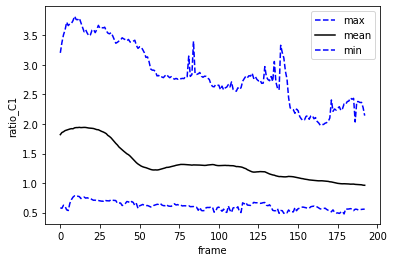

In [7]:
for tiff_path,tiff_name in zip(tiff_file_paths,tiff_file_names):
    tiff_file = io.imread(tiff_path)
    data_table = pd.read_pickle(project_path+"table_tracked/"+tiff_name+".pkl")
    chunks = split_stack(tiff_file,tmp_path,nb_cores)
    tiff_file = []
    color_stack = apply_create_movie(data_table, chunks, variable_name, min_value, max_value, cmap)
    if convert_to_rgb:
        #optional arg 'col': RGB values to fill in (default 255, 255, 255)
        color_stack = rgba_to_rgb(color_stack, col = (0,0,0))
    path = project_path+'movies/'+variable_name+'_'+tiff_name
    io.imsave(path,color_stack)


### Preview the results
Select a frame to look at, and it will show the results of the last tiff file colored.

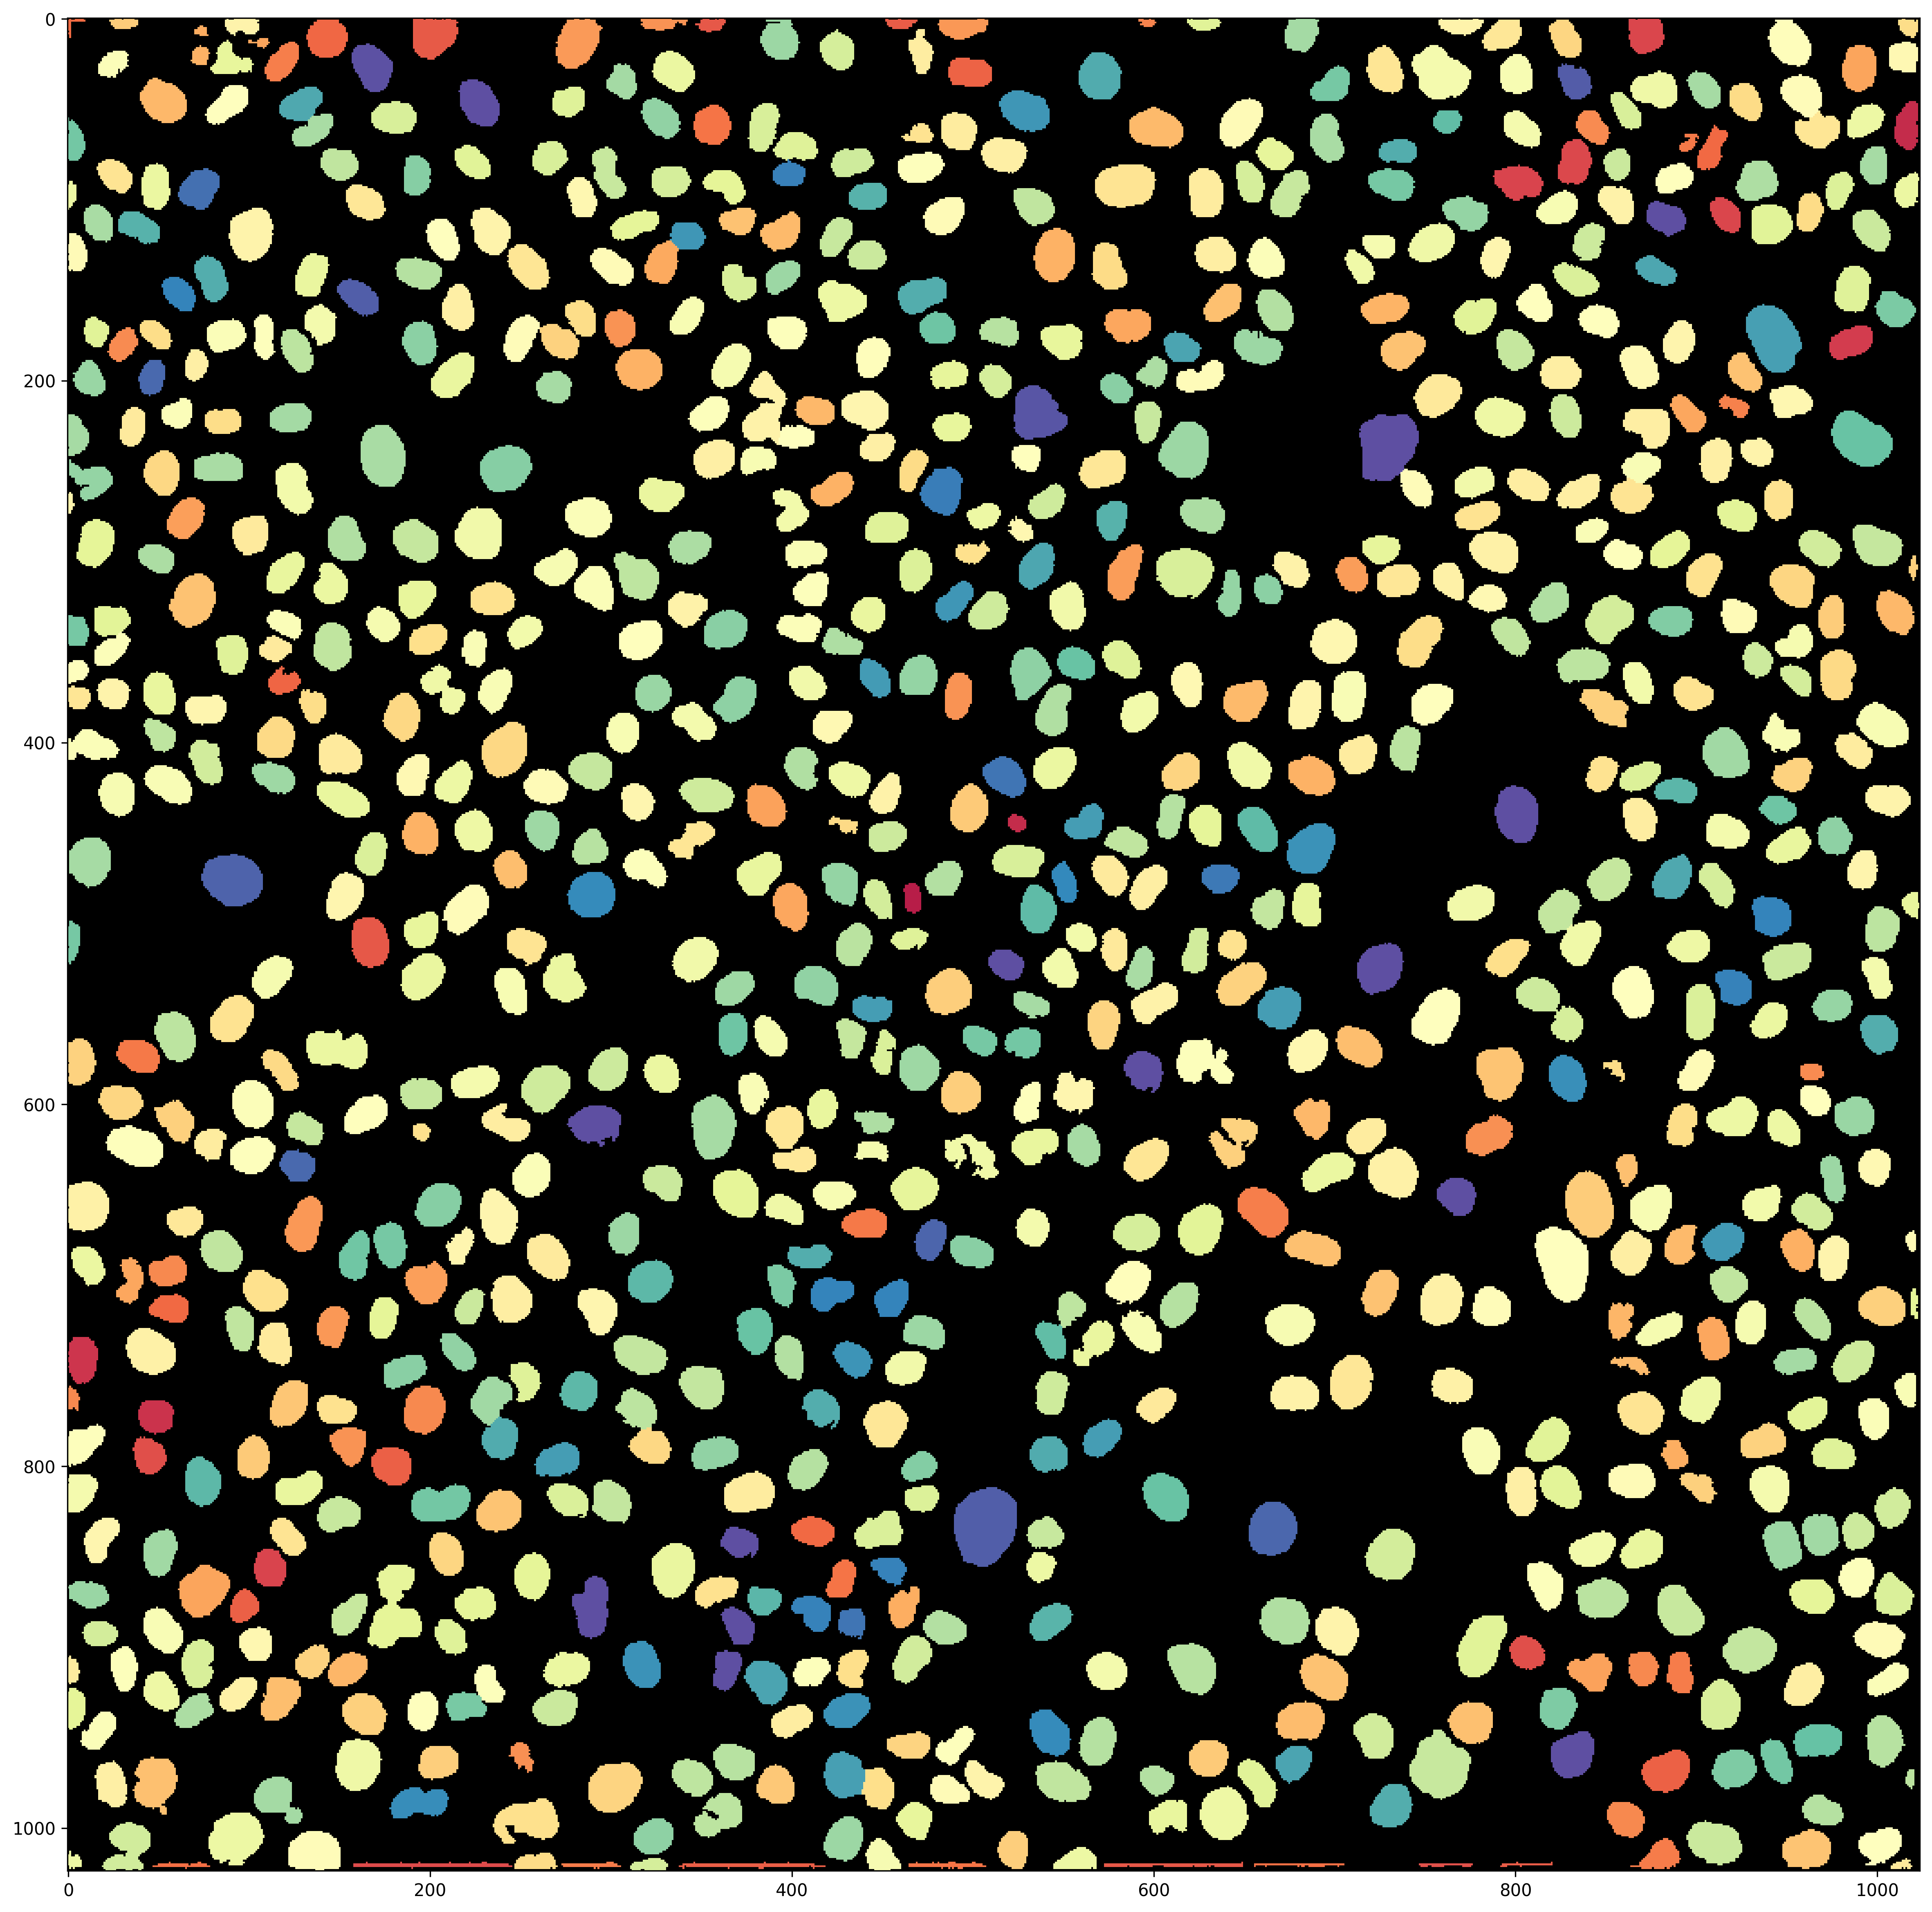

In [8]:
frame_nb = 20
plt.figure(figsize = (20,20),dpi = 300)
plt.imshow(color_stack[frame_nb,:,:])
plt.show()

### Confirm min/max values
The plot below will show the range of the variable chosen over time, to confirm the cmap/clipping of `min_value` and `max_value`.

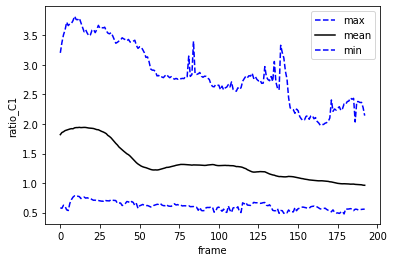

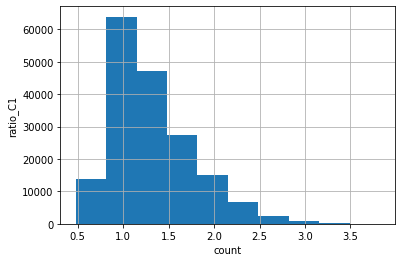

In [9]:

grp = data_table.groupby(['frame'])
grp[variable_name].max().plot(linestyle='--',c = 'b')
grp[variable_name].mean().plot(linestyle='-',c = 'k')
grp[variable_name].min().plot(linestyle='--',c = 'b')
plt.legend(['max','mean','min'])
plt.ylabel(variable_name)
plt.show()

data_table[variable_name].hist()
plt.ylabel(variable_name)
plt.xlabel('count')
plt.show()